In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# SVM for classification

In [2]:
# load MNIST dataset using Keras
(X_mnist, y_mnist), _ = mnist.load_data()

print("X_train shape", X_mnist.shape)
print("y_train shape", y_mnist.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)


In [3]:
def show_images(imgs, num_rows, num_cols):
    assert len(imgs) == num_rows*num_cols

    for i in range(num_rows):
        row = None
        for j in range(num_cols):
            if row is None:
                row = imgs[i*num_cols+j]
            else:
                row = np.concatenate((row, imgs[i*num_cols+j]), axis=1)
        plt.imshow(row, cmap='gray')
        plt.axis('off')
        plt.show()

In [4]:
N_SAMPLES = 50 # get three subsets of N_SAMPLES (training, validation, test)
N_CLASSES = 10

# get the first N_SAMPLES training images per class
train_indices = []
val_indices = []
test_indices = []
y_train = []
for i in range(N_CLASSES):
    train_indices += list(np.where(y_mnist == i)[0][:N_SAMPLES])
    val_indices += list(np.where(y_mnist == i)[0][N_SAMPLES:2*N_SAMPLES])
    test_indices += list(np.where(y_mnist == i)[0][2*N_SAMPLES:3*N_SAMPLES])
    y_train += [i]*N_SAMPLES
X_train = X_mnist[train_indices].reshape(N_SAMPLES*N_CLASSES, -1)
X_val = X_mnist[val_indices].reshape(N_SAMPLES*N_CLASSES, -1)
X_test = X_mnist[test_indices].reshape(N_SAMPLES*N_CLASSES, -1)
y_train = np.asarray(y_train)
y_val = y_train.copy()
y_test = y_train.copy()

print('Training:')
show_images(X_train.reshape(-1, 28, 28), N_CLASSES, N_SAMPLES)

print('Validation:')
show_images(X_val.reshape(-1, 28, 28), N_CLASSES, N_SAMPLES)

print('Test:')
show_images(X_test.reshape(-1, 28, 28), N_CLASSES, N_SAMPLES)

Training:


Validation:


Test:


In [5]:
def plot_confusion(cm):
    plt.rcParams["figure.figsize"] = (5,5)
    fig, ax = plt.subplots()
    c= ax.matshow(cm, cmap='copper')
    fig.colorbar(c, ax=ax)
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', color='w', fontsize=10, weight='bold')
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.show()

Class: 0 / F-score: 0.8865979381443299
Class: 1 / F-score: 0.9019607843137256
Class: 2 / F-score: 0.8080808080808082
Class: 3 / F-score: 0.7111111111111111
Class: 4 / F-score: 0.8
Class: 5 / F-score: 0.7647058823529411
Class: 6 / F-score: 0.9215686274509804
Class: 7 / F-score: 0.8453608247422681
Class: 8 / F-score: 0.7735849056603773
Class: 9 / F-score: 0.8
Average F-score: 0.8212970881856542


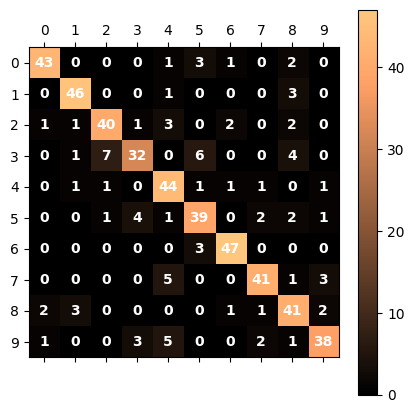

In [6]:
# no hyperparameters to tune for SVM, so let's report result on test set
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# compute F-score for each class
fscores = []
for j in range(10):
    positives = len(y_pred[np.where(y_test == j)])
    true_positives = len(y_pred[np.where((y_pred == j) & (y_test == j))])
    false_positives = len(y_pred[np.where((y_pred == j) & (y_test != j))])

    if true_positives+false_positives == 0:
        precision = 0
    else:
        precision = true_positives/(true_positives+false_positives)
    recall = true_positives/positives
        
    if precision+recall == 0:
        fscore = 0
    else:
        fscore = (2.0*precision*recall)/(precision+recall)
    fscores.append(fscore)

    print('Class: {} / F-score: {}'.format(j, fscore))

print('Average F-score:', np.mean(fscores))
cm = confusion_matrix(y_val, y_pred)
plot_confusion(cm)